# Pet's Faces Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

## Загрузка датасета.

In [73]:
!wget https://mslearntensorflowlp.blob.core.windows.net/data/petfaces.tar.gz
!tar xfz petfaces.tar.gz
!rm petfaces.tar.gz

--2022-05-26 22:34:30--  https://mslearntensorflowlp.blob.core.windows.net/data/petfaces.tar.gz
Resolving mslearntensorflowlp.blob.core.windows.net (mslearntensorflowlp.blob.core.windows.net)... 20.150.90.68
Connecting to mslearntensorflowlp.blob.core.windows.net (mslearntensorflowlp.blob.core.windows.net)|20.150.90.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483412 (23M) [application/x-gzip]
Saving to: ‘petfaces.tar.gz’

petfaces.tar.gz     100%[===================>]  23.35M  38.2MB/s    in 0.6s    

2022-05-26 22:34:30 (38.2 MB/s) - ‘petfaces.tar.gz’ saved [24483412/24483412]



In [74]:
from PIL import Image

def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

dog_keeshond


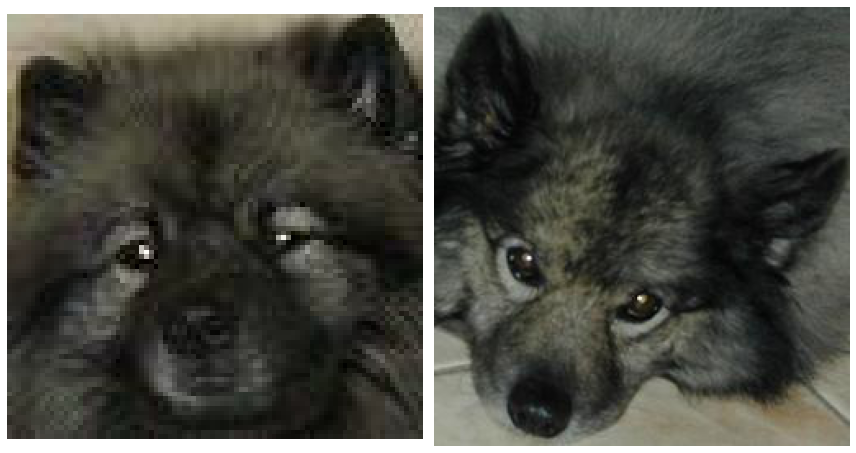

dog_saint


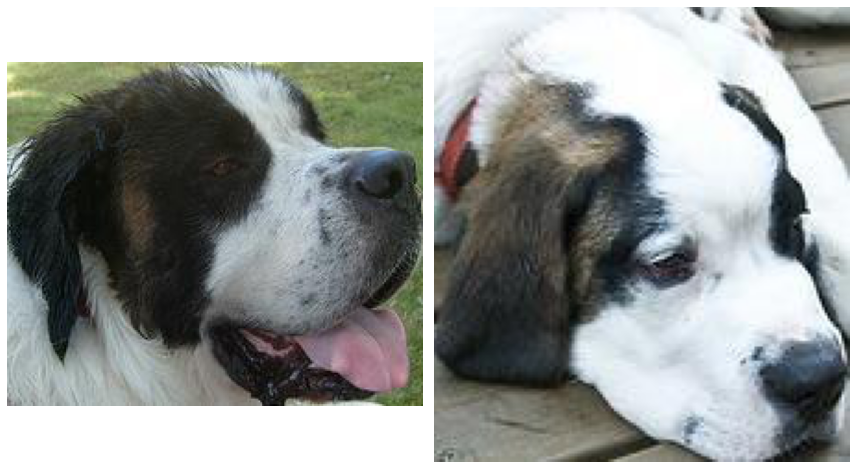

dog_staffordshire


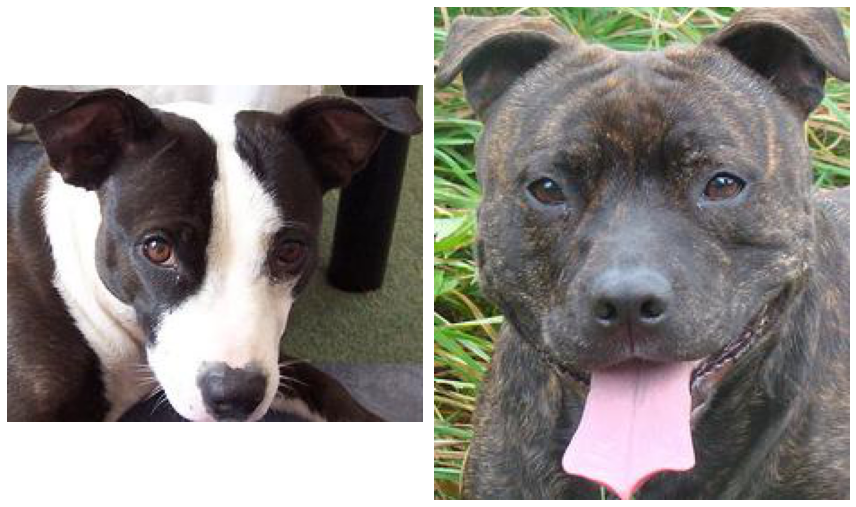

dog_basset


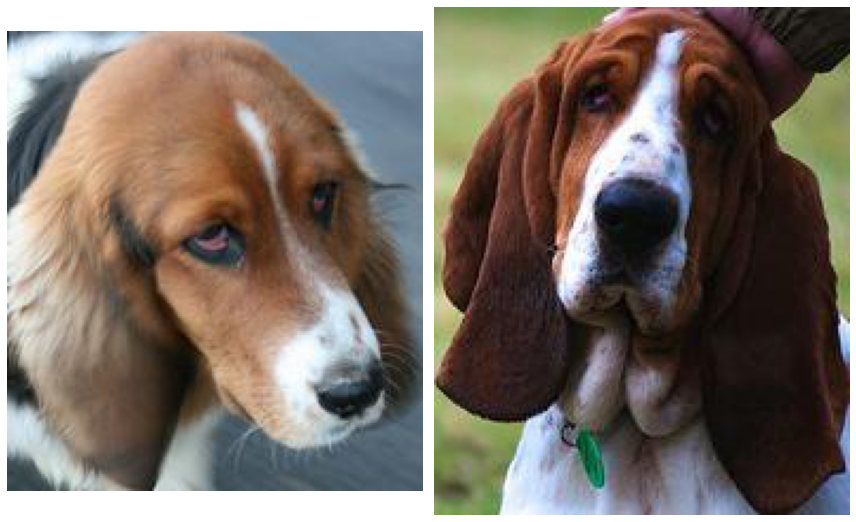

cat_Birman


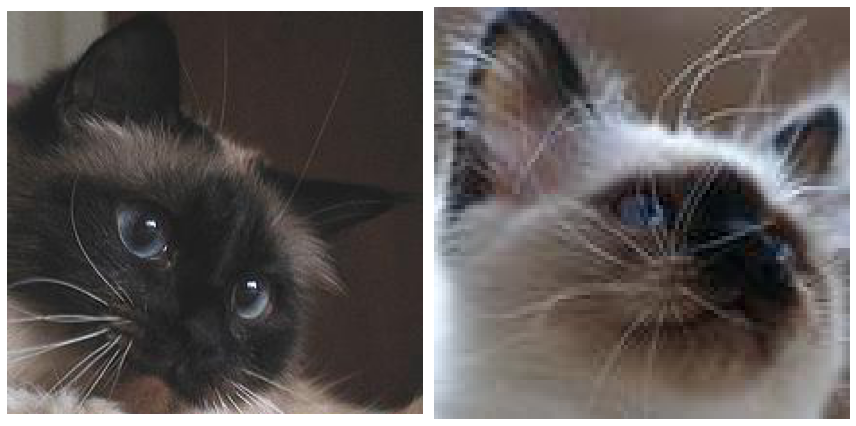

cat_Ragdoll


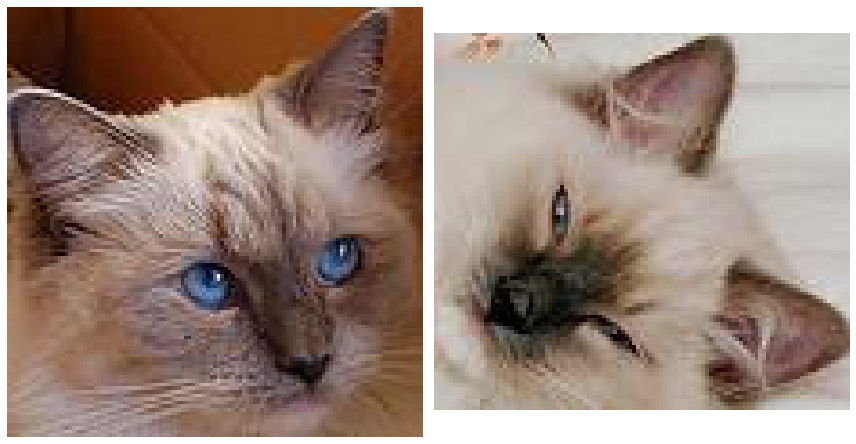

dog_beagle


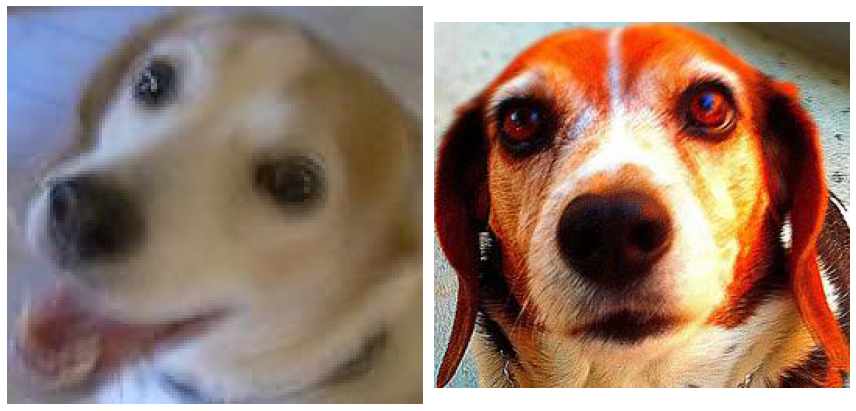

dog_yorkshire


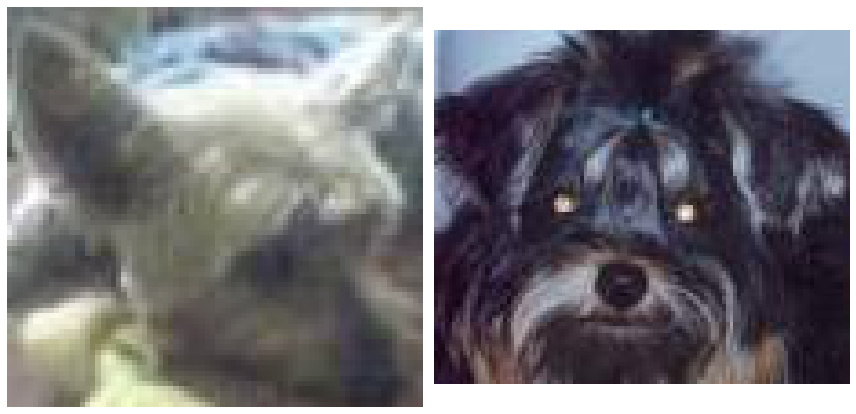

dog_chihuahua


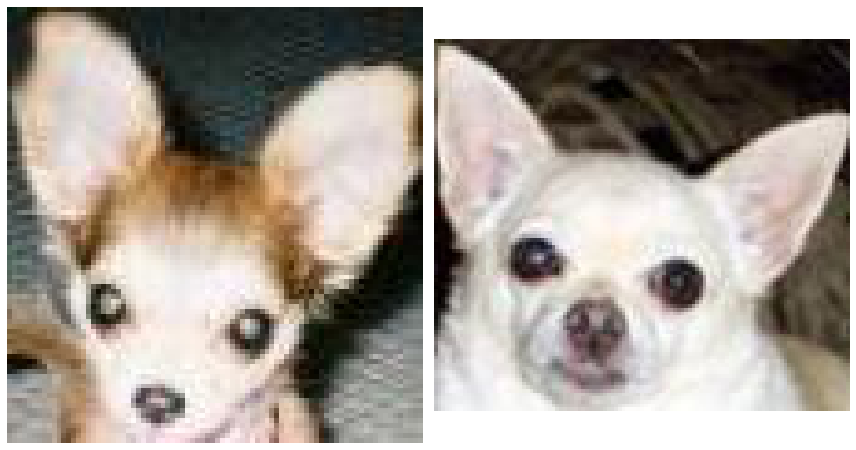

dog_havanese


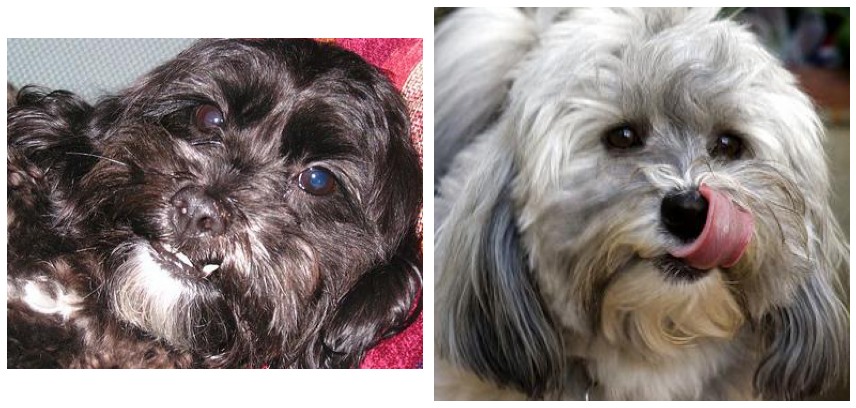

In [80]:
for cls in os.listdir('petfaces')[:10]:
    print(cls)
    display_images([Image.open(os.path.join('petfaces',cls,x)) 
                    for x in os.listdir(os.path.join('petfaces',cls))[:2]])

In [ ]:
num_classes = len(os.listdir('petfaces'))
num_classes

35

In [ ]:
sum = 0
for cls in os.listdir('petfaces'):
    sum += len(os.listdir('petfaces'+'/'+cls))
sum

3211

## Разделение данных на test и train. Обработка Данных.

Необходимо разделить датасет на test и train. Сложность в том, что датасет скачен в папке, попробуем достать из каждой папки некторое количество картинок и переместить их в папку для тестирования - dest_dir. Делить датасет будем в отношении 20:80.

In [ ]:
shutil.rmtree("dest_dir")

In [ ]:
os.mkdir("dest_dir")

In [ ]:
source = "petfaces"
dest = "dest_dir"
files = os.listdir(source)

for f in files:
  os.mkdir("dest_dir" + '/' + f)

In [ ]:
for f in files:
  for i in os.listdir(source + '/' + f):
      if np.random.rand(1) < 0.2:
          shutil.move(source + '/'+ f+ '/'+ i, dest + '/'+ f)

In [ ]:
num_classes_train = len(os.listdir('petfaces'))
num_classes_test = len(os.listdir('dest_dir'))

In [ ]:
num_classes_train

35

In [ ]:
num_classes_test

35

In [ ]:
sum = 0
for cls in os.listdir('dest_dir'):
    sum += len(os.listdir('dest_dir'+'/'+cls))
sum

640

In [ ]:
sum = 0
for cls in os.listdir('petfaces'):
    sum += len(os.listdir('petfaces'+'/'+cls))
sum

2571

Теперь данные разделены на test - dest_dir и train - petfaces.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'petfaces',
  seed=123,
  image_size=(128, 128),
  batch_size=32)

Found 2571 files belonging to 35 classes.


In [ ]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Построим модель

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),           
  tf.keras.layers.Conv2D(16, 3,padding='same', activation='relu', input_shape = (128,128,3)),
  tf.keras.layers.MaxPooling2D((3,3), strides = (2,2), padding='same'),
  tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides = (2,2), padding='same'),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides = (2,2), padding='same'),
  tf.keras.layers.Conv2D(128, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides = (2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(35, activation='softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  'dest_dir',
  image_size=(128, 128),
  seed = 123,
  batch_size=32)

Found 640 files belonging to 35 classes.


In [ ]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


81/81 [==============================] - 71s 861ms/step - loss: 3.4680 - accuracy: 0.0653 - val_loss: 3.2179 - val_accuracy: 0.1328
Epoch 2/10
81/81 [==============================] - 78s 963ms/step - loss: 2.6574 - accuracy: 0.2450 - val_loss: 2.4722 - val_accuracy: 0.3250
Epoch 3/10
81/81 [==============================] - 63s 773ms/step - loss: 1.9426 - accuracy: 0.4399 - val_loss: 2.1394 - val_accuracy: 0.4062
Epoch 4/10
81/81 [==============================] - 61s 747ms/step - loss: 1.4296 - accuracy: 0.5792 - val_loss: 2.0877 - val_accuracy: 0.4422
Epoch 5/10
81/81 [==============================] - 54s 670ms/step - loss: 1.0609 - accuracy: 0.6702 - val_loss: 1.9460 - val_accuracy: 0.4922
Epoch 6/10
81/81 [==============================] - 54s 669ms/step - loss: 0.8299 - accuracy: 0.7351 - val_loss: 1.8660 - val_accuracy: 0.5422
Epoch 7/10
81/81 [==============================] - 54s 668ms/step - loss: 0.5823 - accuracy: 0.8203 - val_loss: 2.0825 - val_accuracy: 0.5172
Epoch 8/10

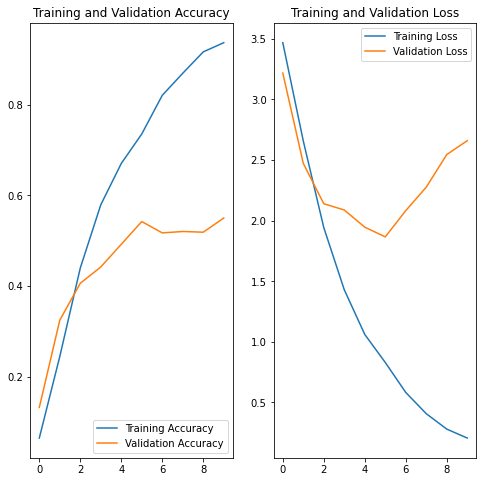

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Явно происходит переобучение, побробуем увеличить размер выборки.

In [ ]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.1),
    #tf.keras.layers.RandomZoom(0.1),
  ]
)

In [ ]:
model2 = tf.keras.Sequential([
  data_augmentation, 
  tf.keras.layers.Rescaling(1./255),           
  tf.keras.layers.Conv2D(16, 3,padding='same', activation='relu', input_shape = (128,128,3)),
  tf.keras.layers.MaxPooling2D((3,3), strides = (2,2), padding='same'),
  tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides = (2,2), padding='same'),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides = (2,2), padding='same'),
  tf.keras.layers.Conv2D(128, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides = (2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(35, activation='softmax')
])

In [ ]:
model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model2.fit(
  train_ds,
  validation_data=test_ds,
  epochs=15
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


81/81 [==============================] - 58s 709ms/step - loss: 3.5116 - accuracy: 0.0615 - val_loss: 3.3516 - val_accuracy: 0.0906
Epoch 2/15
81/81 [==============================] - 58s 711ms/step - loss: 3.1689 - accuracy: 0.1249 - val_loss: 3.2677 - val_accuracy: 0.1344
Epoch 3/15
81/81 [==============================] - 58s 714ms/step - loss: 2.7822 - accuracy: 0.2069 - val_loss: 2.6765 - val_accuracy: 0.2375
Epoch 4/15
81/81 [==============================] - 58s 712ms/step - loss: 2.4484 - accuracy: 0.2972 - val_loss: 2.3155 - val_accuracy: 0.3531
Epoch 5/15
81/81 [==============================] - 58s 715ms/step - loss: 2.2088 - accuracy: 0.3512 - val_loss: 2.1344 - val_accuracy: 0.3844
Epoch 6/15
81/81 [==============================] - 58s 713ms/step - loss: 2.0248 - accuracy: 0.4045 - val_loss: 1.9280 - val_accuracy: 0.4391
Epoch 7/15
81/81 [==============================] - 58s 716ms/step - loss: 1.8053 - accuracy: 0.4652 - val_loss: 1.8469 - val_accuracy: 0.4891
Epoch 8/15

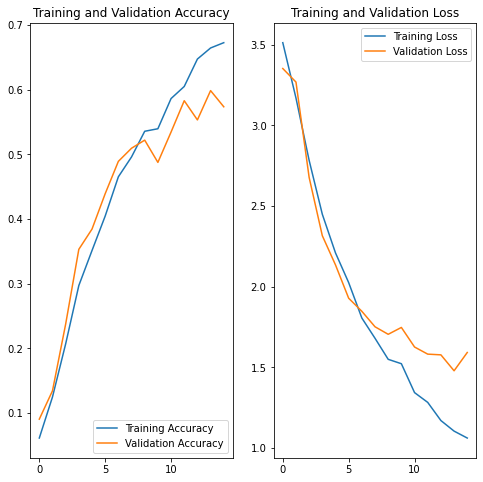

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

стало лучше.

## Кошки против собак + Confusion Matrix + top3

In [ ]:
class_names = train_ds.class_names
print(class_names)

['cat_Abyssinian', 'cat_Bengal', 'cat_Birman', 'cat_Bombay', 'cat_British', 'cat_Egyptian', 'cat_Maine', 'cat_Persian', 'cat_Ragdoll', 'cat_Russian', 'cat_Siamese', 'cat_Sphynx', 'dog_american', 'dog_basset', 'dog_beagle', 'dog_boxer', 'dog_chihuahua', 'dog_english', 'dog_german', 'dog_great', 'dog_havanese', 'dog_japanese', 'dog_keeshond', 'dog_leonberger', 'dog_miniature', 'dog_newfoundland', 'dog_pomeranian', 'dog_pug', 'dog_saint', 'dog_samoyed', 'dog_scottish', 'dog_shiba', 'dog_staffordshire', 'dog_wheaten', 'dog_yorkshire']


In [ ]:
Cats = ['cat_Abyssinian', 'cat_Bengal', 'cat_Birman', 'cat_Bombay', 'cat_British', 'cat_Egyptian', 'cat_Maine', 'cat_Persian', 'cat_Ragdoll', 'cat_Russian', 'cat_Siamese', 'cat_Sphynx']
Dogs = ['dog_american', 'dog_basset', 'dog_beagle', 'dog_boxer', 'dog_chihuahua', 'dog_english', 'dog_german', 'dog_great', 'dog_havanese', 'dog_japanese', 'dog_keeshond', 'dog_leonberger', 'dog_miniature', 'dog_newfoundland', 'dog_pomeranian', 'dog_pug', 'dog_saint', 'dog_samoyed', 'dog_scottish', 'dog_shiba', 'dog_staffordshire', 'dog_wheaten', 'dog_yorkshire']

In [ ]:
true = 0
sum = 0
pred = []
labels = []
true_top3 = 0

for i in os.listdir('dest_dir'):
  for k in os.listdir('dest_dir' + '/' + i):
    sum +=1

    img = tf.keras.utils.load_img('dest_dir' + '/' + i + '/' + k, target_size=(128, 128))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model2.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    #массивы для confosion matrix
    labels.append(class_names.index(i))
    pred.append(np.argmax(score))
    
    #операции для определения top-3 accuracy
    arr_score = np.argsort(np.array(score))
    if class_names[arr_score[-1]] == i or class_names[arr_score[-2]] == i or class_names[arr_score[-3]] == i:
      true_top3+=1

    #подсчет accuracy для определения кошек/собак
    if '_'.join(class_names[np.argmax(score)].split('_')[:-1]) == '_'.join(i.split('_')[:-1]):
      true+=1

res1 = true/sum
print('accuracy for cat/dog classification:', res1)
res2 = true_top3/sum
print('accuracy for top-3:', res2)

accuracy for cat/dog classification: 0.93125
accuracy for top-3: 0.7921875


Отличный результат предсказания для бинарной классификации, еще улучшилось качество предсказания для определения попрод с использованием первых трех наиболее вероятных классов.

Confusion matrix:

In [ ]:
preds = tf.convert_to_tensor(pred, dtype=tf.float32)
labels = tf.convert_to_tensor(labels, dtype=tf.float32)
classes = [l for l in range(35)]

In [ ]:
import seaborn as sns
import pandas as pd

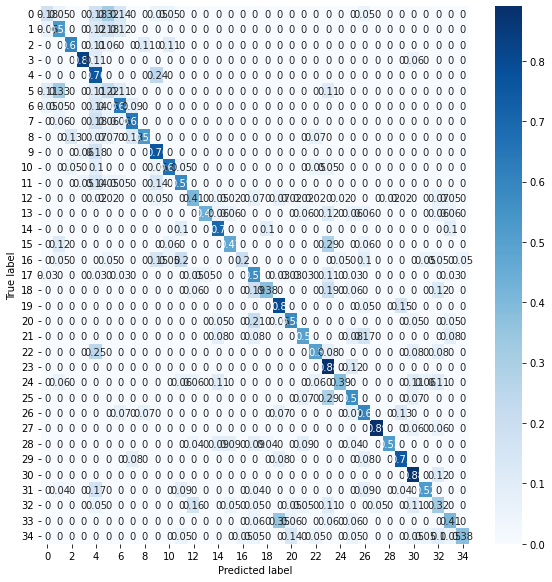

In [ ]:
con_mat = tf.math.confusion_matrix(
    labels,
    preds,
).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()